In [14]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

In [2]:
# Rutas de las carpetas de entrenamiento, predicción y test
training_path = 'training'
test_path = 'test'
prediction_path = 'prediction'

In [3]:
# Aumentación de datos con rescalamiento, rotación, traslación, zoom y giro horizontal
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True
)

Found 14034 images belonging to 6 classes.


<Figure size 640x480 with 0 Axes>

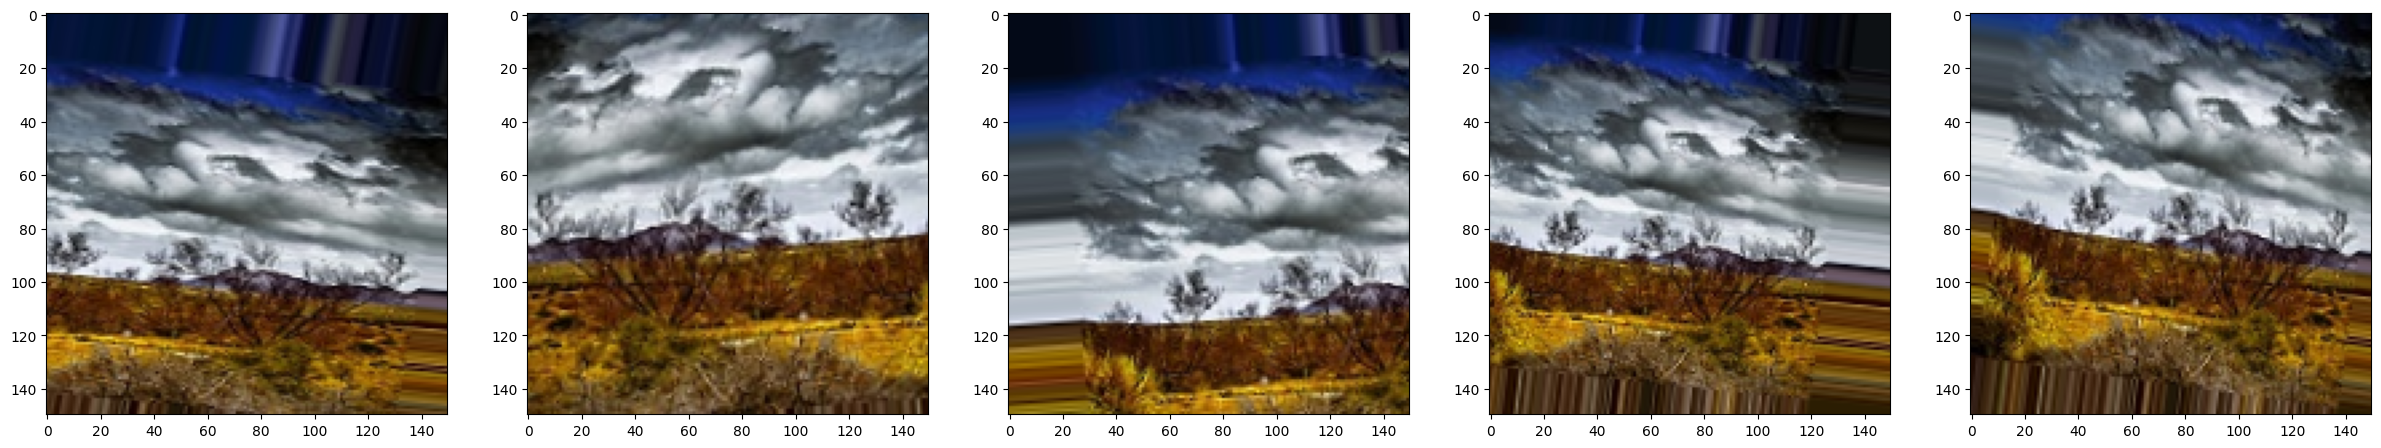

In [4]:
# Crear generadores de datos a partir de los directorios de entrenamiento y prueba
train_generator = datagen.flow_from_directory(
    training_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Crear un plt para mostrar las imágenes
plt.figure()
f, axarr = plt.subplots(1, 5, figsize=(30, 8))

# Iterar sobre las primeras 5 imágenes del generador y mostrarlas
for i in range(5) :
  axarr[i].imshow(train_generator[0][0][0])

Found 14034 images belonging to 6 classes.
(8, 150, 150, 3)
[[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


<Figure size 640x480 with 0 Axes>

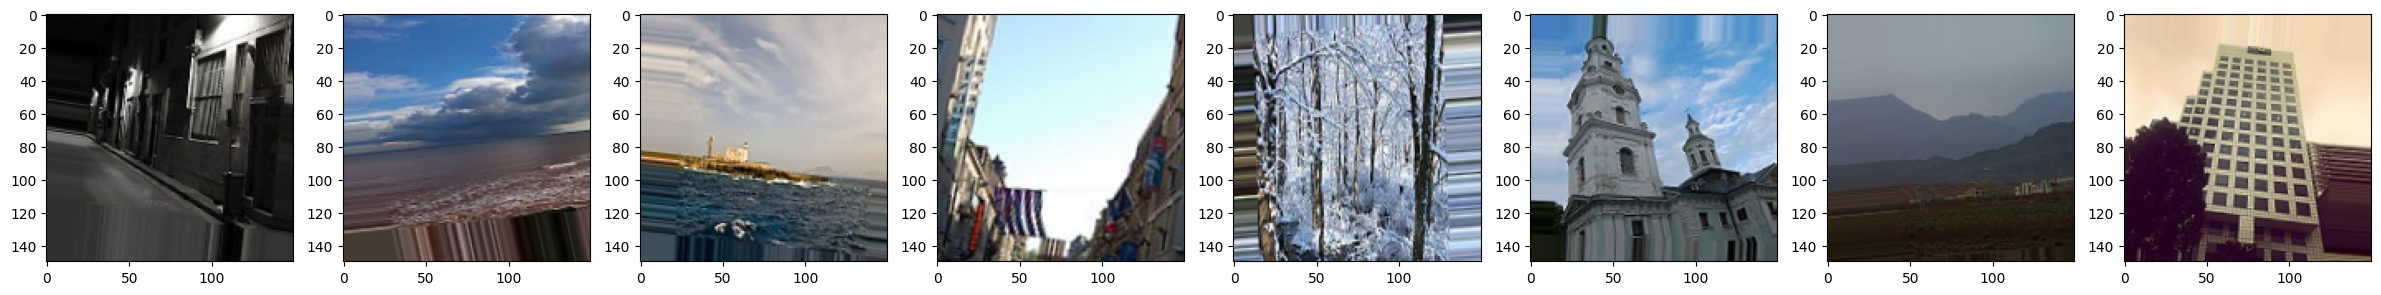

In [5]:
# Crear un generador de datos a partir de un directorio de entrenamiento
train_generator = datagen.flow_from_directory(
    training_path,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical'
)

images, labels = next(train_generator)

print(images.shape)
print(labels)
plt.figure()
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4))

for i in range(images.shape[0]):
    axarr[i].imshow(images[i])

# Mostrar las imágenes del principio
plt.show()

In [6]:
# Generador de datos a utilizar a partir del directorio de testing
test_generator = datagen.flow_from_directory(
    test_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Generador de datos a utilizar a partir del directorio de entrenamiento
train_generator = datagen.flow_from_directory(
    training_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 3000 images belonging to 6 classes.
Found 14034 images belonging to 6 classes.


In [22]:
# Cargar el modelo ResNet50 pre-entrenado
base_model = ResNet50(weights='imagenet', include_top=False)

# Añadir capas para el procesamiento y clasificación de la información.
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(6, activation='softmax')(x)

In [8]:
# Definir el modelo final y congelar todas las capas de la base ResNet50
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers[:100]:
    layer.trainable = False

# Compilación y entrenamiento del modelo usando 20 épocas para mayor exactitud.
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(
    train_generator,
    epochs=10,
    callbacks=[early_stopping],
)

Epoch 1/10


c:\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


439/439 ━━━━━━━━━━━━━━━━━━━━ 500s 1s/step - accuracy: 0.4988 - loss: 1.2098
Epoch 2/10


c:\Python311\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


439/439 ━━━━━━━━━━━━━━━━━━━━ 481s 1s/step - accuracy: 0.6250 - loss: 0.9395
Epoch 3/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 480s 1s/step - accuracy: 0.6654 - loss: 0.8746
Epoch 4/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 479s 1s/step - accuracy: 0.6914 - loss: 0.8040
Epoch 5/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 482s 1s/step - accuracy: 0.7153 - loss: 0.7657
Epoch 6/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 501s 1s/step - accuracy: 0.7164 - loss: 0.7366
Epoch 7/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 481s 1s/step - accuracy: 0.7360 - loss: 0.7125
Epoch 8/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 508s 1s/step - accuracy: 0.7298 - loss: 0.7026
Epoch 9/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 515s 1s/step - accuracy: 0.7534 - loss: 0.6587
Epoch 10/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 507s 1s/step - accuracy: 0.7549 - loss: 0.6475


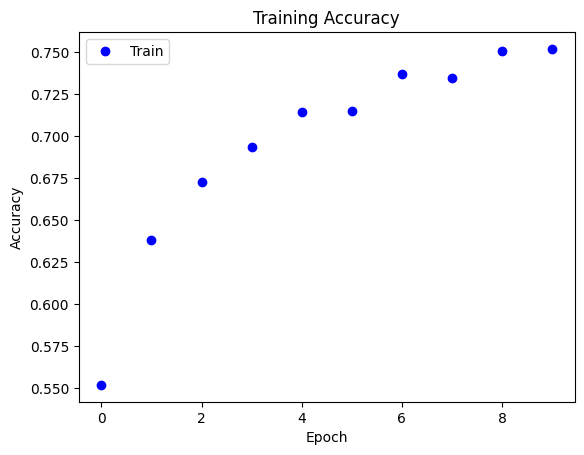

In [9]:
# Mostrar las curvas de precisión del entrenamiento
plt.plot(history.history['accuracy'], 'bo', label='Train Accuracy')
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

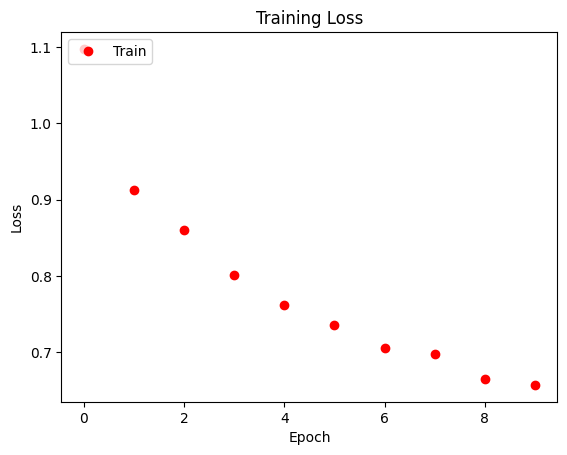

In [10]:
# Mostrar las curvas de pérdida del entrenamiento
plt.plot(history.history['loss'], 'ro', label='Train Loss')
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [11]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')

94/94 ━━━━━━━━━━━━━━━━━━━━ 50s 515ms/step - accuracy: 0.5425 - loss: 1.3138
Test Accuracy: 0.5333333611488342
Test Loss: 1.3429832458496094
